In [98]:
import numpy as np
import matplotlib.pyplot as plt 


In [114]:
x = np.linspace(0.5,0.99999,2000)
#rescaling to find mantissa 
y1,y2 = np.frexp(x)

#putting these back into our log function 
y = np.log2(y1) + y2
deg = 50

In [115]:
cheb_coeffs = np.polynomial.chebyshev.chebfit(y1,y,deg) #using the mantissa as x 
cheb_coeffs[np.abs(cheb_coeffs)<1e-5] = 0 
cheb_func = np.polynomial.chebyshev.chebval(x,cheb_coeffs)# using regular x 


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: The fit may be poorly conditioned
  """Entry point for launching an IPython kernel.


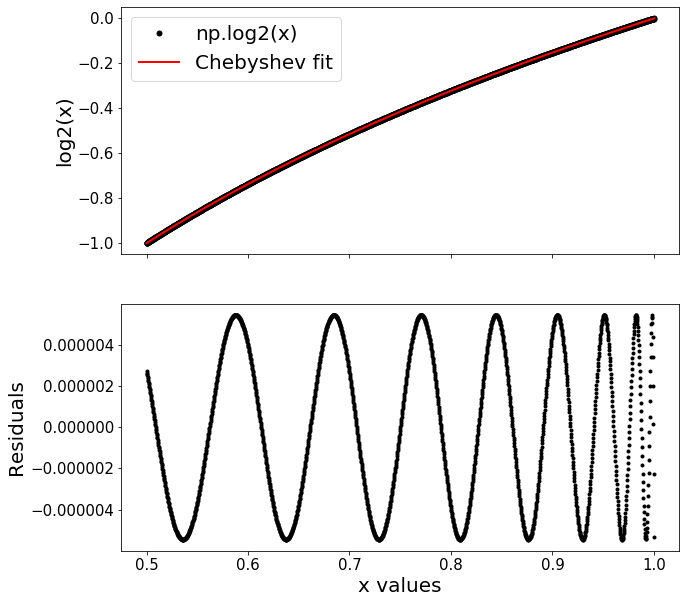

In [117]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(10,10),sharex=True)


ax1.plot(x,y,'k.',markersize=10,label='np.log2(x)')
ax1.plot(x,cheb_func,'r-',linewidth=2,label='Chebyshev fit')
ax1.set_ylabel('log2(x)',fontsize=20)
ax1.tick_params(labelsize=15)
ax1.legend(fontsize=20)

ax2.plot(x, y - cheb_func,'k.')
ax2.set_xlabel('x values',fontsize=20)
ax2.set_ylabel('Residuals',fontsize=20)
ax2.tick_params(labelsize=15)

#At an order of 50 degrees our accuracy is decent!  
#The residuals have a funky pattern but I think that's okay 


In [118]:
#Defining a natural log calculator using the steps we did above! 

def nat_log(x):
    #rescaling 
    m, n = np.frexp(x)
    a, b = np.frexp(np.e)
    #Using our Chebyshev fit instead of log2(x) on our decomposed values!     
    num = n + np.polynomial.chebyshev.chebval(m,cheb_coeffs)
    den = b + np.polynomial.chebyshev.chebval(a,cheb_coeffs)
    return num/den


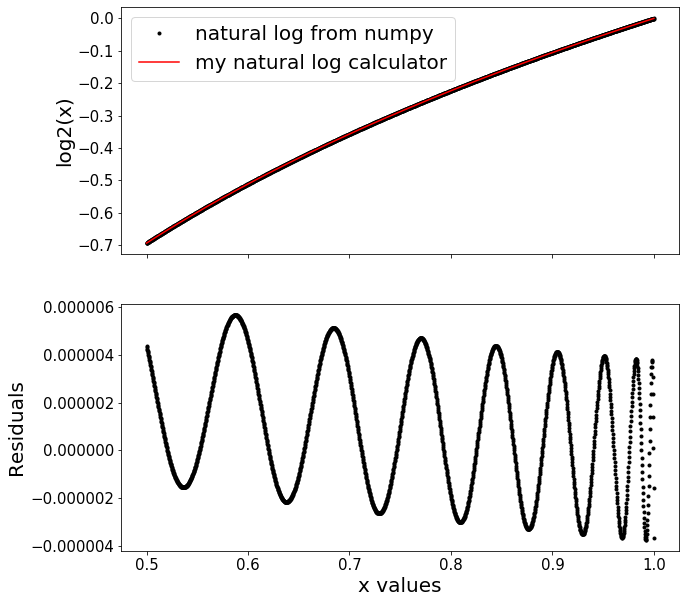

In [119]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(10,10),sharex=True)

ax1.plot(x,np.log(x),'k.',label='natural log from numpy')
ax1.plot(x,nat_log(x),'r-',label='my natural log calculator')
ax1.set_ylabel('log2(x)',fontsize=20)
ax1.tick_params(labelsize=15)
ax1.legend(fontsize=20)

ax2.plot(x, np.log(x) - nat_log(x),'k.')
ax2.set_xlabel('x values',fontsize=20)
ax2.set_ylabel('Residuals',fontsize=20)
ax2.tick_params(labelsize=15)



In [120]:
#small test to see if it works by inputting e 
nat_log(np.e)

1.0